### Anchors and Routes

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# use '%matplotlib widget' for interactive plot

import sys
import numpy as np

from shapely.affinity import translate

from zeroheliumkit import Anchor, SuperStructure, Structure
from zeroheliumkit import Square, Rectangle
from zeroheliumkit.src.plotting import *


In [2]:
ab = Structure()
ab.add_layer("open", Square(8, (0,-12), round_radius=3.9), color=GREEN, alpha=0.8)
ab.add_polygon("open", Square(8, (0,12), round_radius=3.9))
ab.add_layer("air", Rectangle(6, 30, round_radius=2.9), color=GRAY, alpha=0.5)

ab_main = ab.copy()
ab_main.anchors.add([Anchor((0,12), 90, "out"), Anchor((0,-12), 90, "in")])

# ab_main.quickplot()

<MULTIANCHOR ['out', 'in']>

route between a6 and a7: bezier curve
route between a6 and 0in: fillet curve
using smaller radius for routing
route between 0out and 1in: fillet curve, mod radius is 6.4799999999999995
route between 1out and a7: bezier curve


<Axes: >

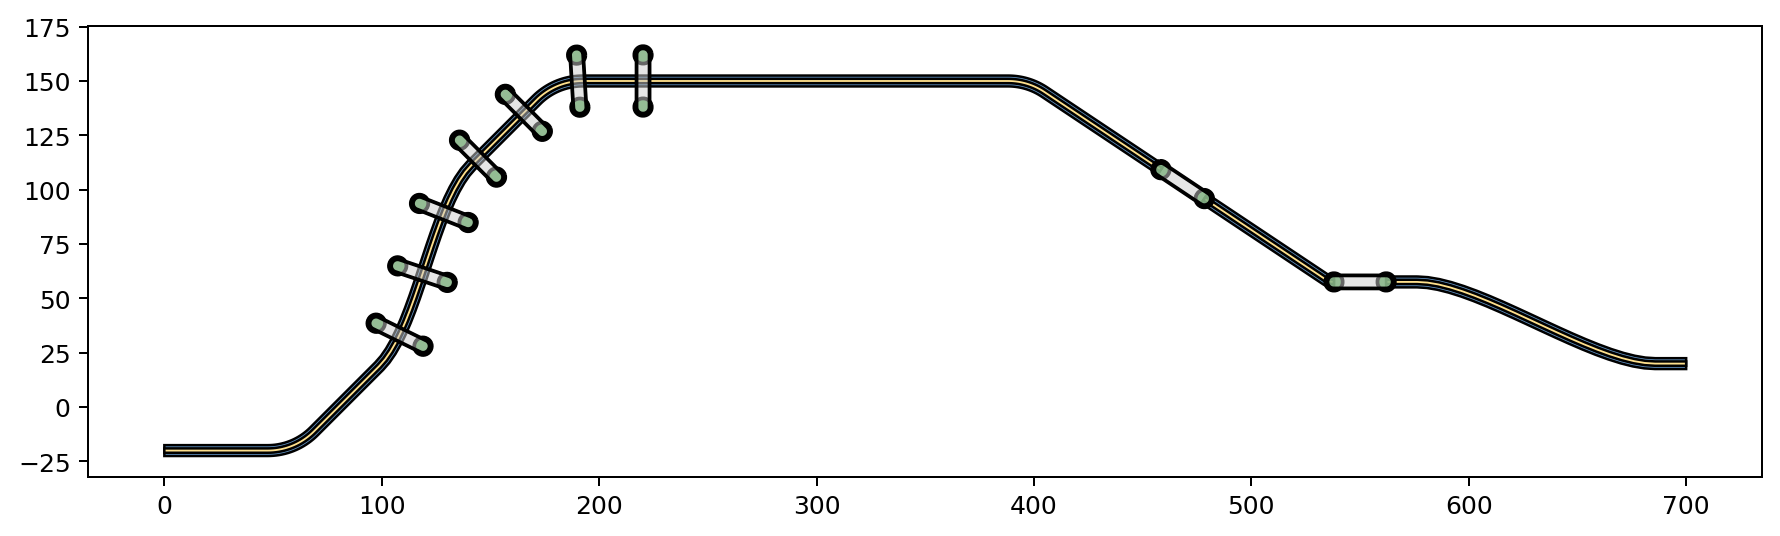

In [3]:
route_config = {"radius": 30, "num_segments": 20}

ss = SuperStructure(route_config)
ss.add_layer("layer1", color=BLUE)
ss.add_layer("layer2", color=YELLOW2)
ss.anchors.add([Anchor((0,-20), 0, "a1"),
               Anchor((90,10), 45, "a2"),
               Anchor((150,120), 45, "a3"),
               Anchor((250,150), 0, "a5"),
               Anchor((300,150), 00, "a6")])

ss.route(("a1", "a2", "a3"), layers={"layer1": 5, "layer2": 2})
ss.route(("a3", "a5", "a6"), layers={"layer1": 5, "layer2": 2})

ss.add_along_skeletone(bound_anchors=("a2", "a5"), num=7, structure=ab)
ss.skeletone.add(LineString([(400, 0), (500, 150)]), chaining=False).add(LineString([(550, 0), (550, 150)]), chaining=False)

ss.anchors.add(Anchor((700, 20), 0, "a7"))
ss.route(("a6", "a7"), layers={"layer1": 5, "layer2": 2}, airbridge=ab_main, print_status=True)

ss.skeletone.remove()
ss.anchors.remove()

ss.quickplot()

route between a5 and a6: bezier curve
route between a3 and a4: bezier curve
route between a1 and a2: straight line


<Axes: >

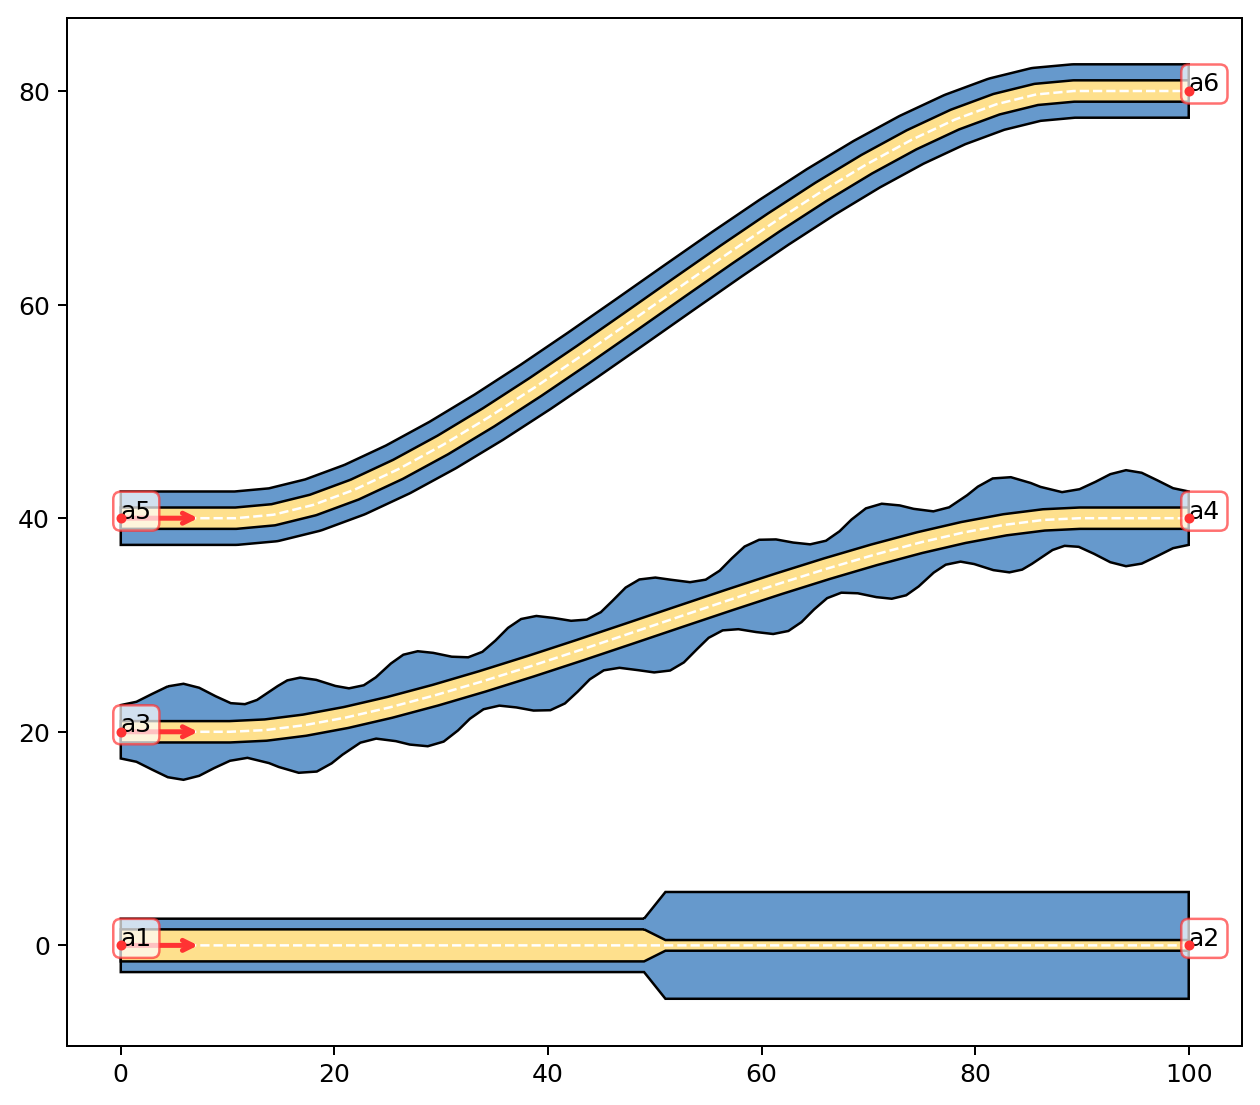

In [4]:
plot_cfg = {"gnd": BLUE, "top": YELLOW2, "anchors": RED, "skeletone": WHITE}
route_config = {"radius": 30, "num_segments": 20}

s = SuperStructure(route_config)
s.anchors.add([Anchor((0,0), 0, "a1"),
              Anchor((100,0), 0, "a2"),
              Anchor((0,20), 0, "a3"),
              Anchor((100,40), 0, "a4"),
              Anchor((0,40), 0, "a5"),
              Anchor((100,80), 0, "a6")])

s.route(("a5", "a6"), layers={"top": 2, "gnd": 5}, print_status=True)
s.route(("a3", "a4"), layers={"top": 2, "gnd": 7 - 2*np.cos(18*np.pi*np.linspace(0,1,71))}, print_status=True)         
s.route(("a1", "a2"), layers={"top": {"d": [0, 0.49, 0.51, 1], "w": [3, 3, 1, 1], "normalized": True},
                              "gnd": {"d": [0, 49, 51, 100], "w": [5, 5, 10, 10], "normalized": False}}, print_status=True)

s.quickplot(plot_cfg)

In [ ]:
### New method of routing using ContinuousLineBuilder class

In [5]:
from zeroheliumkit import ContinuousLineBuilder, RoutingConfig, ObjsAlongConfig

<Axes: >

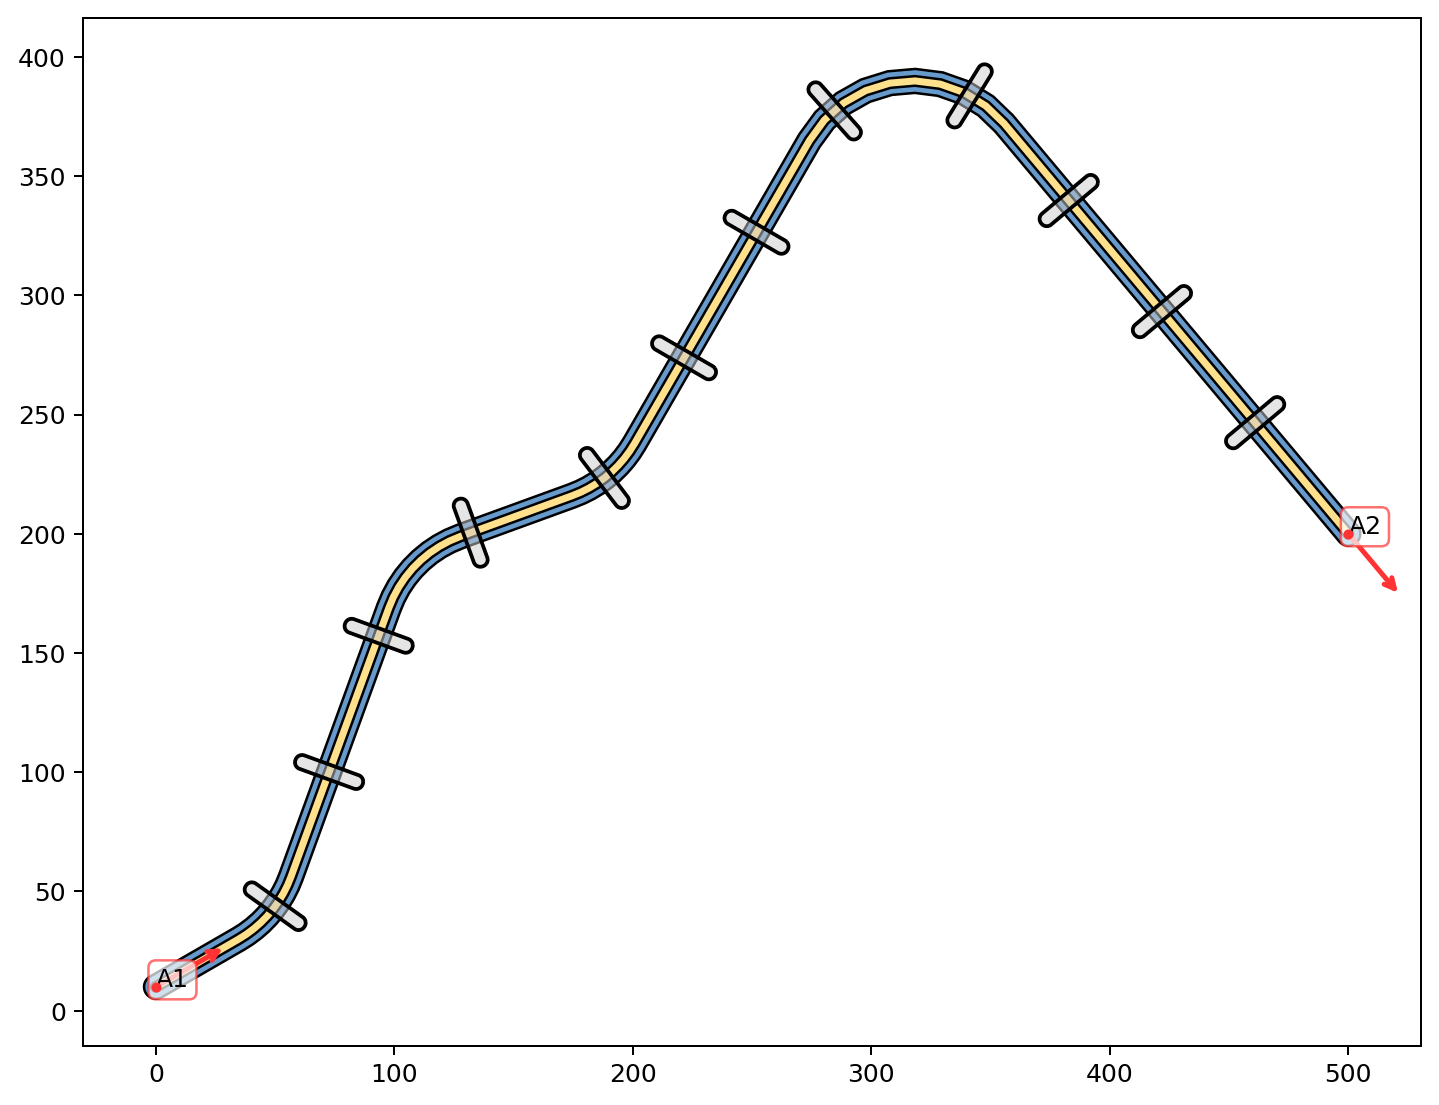

In [6]:
r = Structure()
route = ContinuousLineBuilder(routing=RoutingConfig(radius=50, num_segments=10),
                              layers={"layer2": 4, "layer1": 10},
                              objs_along=ObjsAlongConfig(structure=ab, spacing=60, endpoints=False))

r.anchors.add(Anchor((0,10), 30, "A1"))
r.anchors.add(Anchor((500,200), -50, "A2"))

route.start(r.anchors["A1"]).go(40,40).go(120,-50).go(50,40).routeto(r.anchors["A2"]).build_all()
r.append(route.structure)

r.colors = ColorHandler({
    "layer1": BLUE,
    "layer2": YELLOW2,
    "air": (GRAY, 0.5)
})
r.skeletone.remove()

r.quickplot()